# Objective:
To implement the techniques learnt as a part of the course.

## Learning Outcomes:
* Pre-processing of image data.
* Visualization of images.
* Building CNN.
* Evaluate the Model.
* The motive of the project is to make the learners capable to handle images/image classification problems, during this process you shouldalso be capable to handle real image files, not just limited to a numpy array of image pixels

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importnecessarylibraries.
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas as pd

from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split


### Loading input data set into and numpy array and dataframe 

In [3]:
np_image = np.load(r'/content/drive/MyDrive/Colab Notebooks/AIML_DataFiles/images.npy')
df_lbl = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/AIML_DataFiles/Labels.csv')

In [4]:
np_image.shape

(4750, 128, 128, 3)

In [5]:
df_lbl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


In [6]:
df_lbl.head()


Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill

In [7]:
df_lbl.head()

Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill

## Get the lable image count present in the label data set 

In [8]:
#Get what are the label and its count
df_lbl.groupby('Label').size()

Label
Black-grass                  263
Charlock                     390
Cleavers                     287
Common Chickweed             611
Common wheat                 221
Fat Hen                      475
Loose Silky-bent             654
Maize                        221
Scentless Mayweed            516
Shepherds Purse              231
Small-flowered Cranesbill    496
Sugar beet                   385
dtype: int64

### Plotting the label data set using Count plot

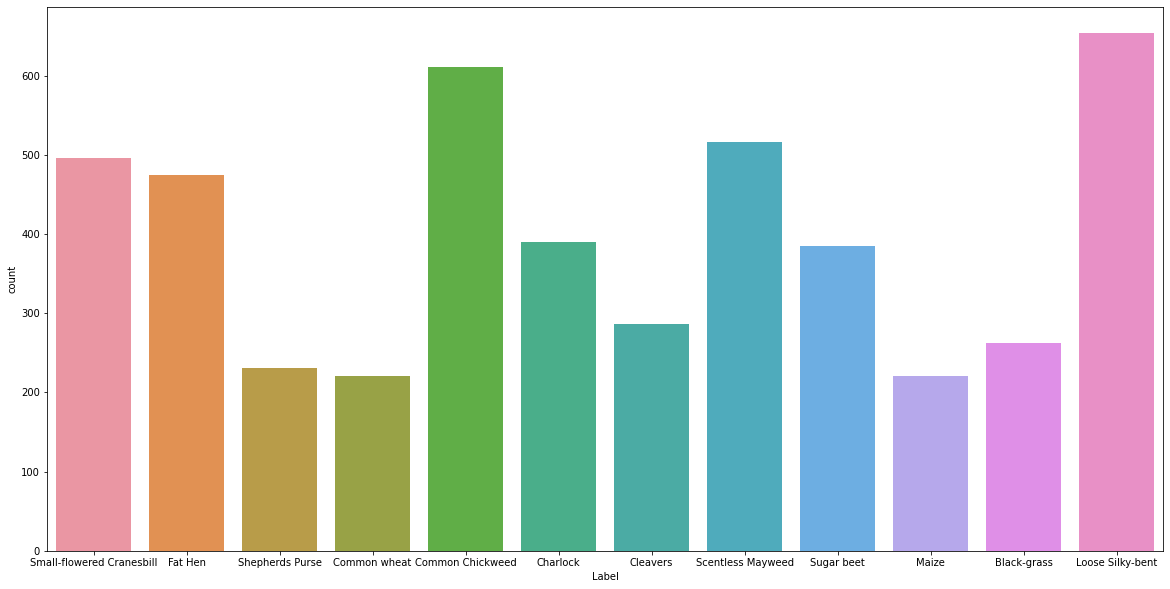

In [9]:
plt.figure(figsize=(20,10));
sns.countplot(x='Label',data=df_lbl,orient="h");

## View input data set image using image show function

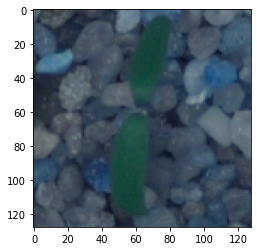

Label    Fat Hen
Name: 496, dtype: object


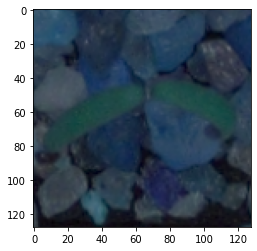

Label    Fat Hen
Name: 497, dtype: object


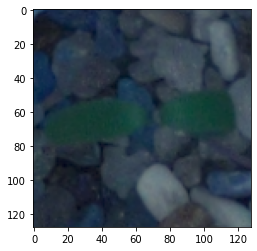

Label    Fat Hen
Name: 498, dtype: object


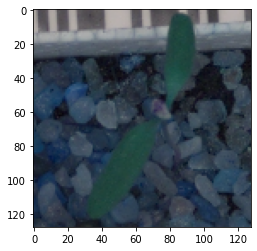

Label    Fat Hen
Name: 499, dtype: object


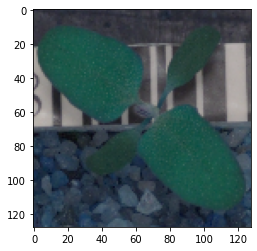

Label    Fat Hen
Name: 500, dtype: object


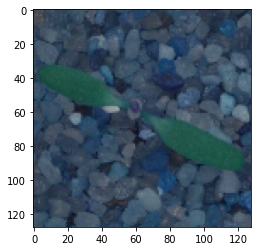

Label    Fat Hen
Name: 501, dtype: object


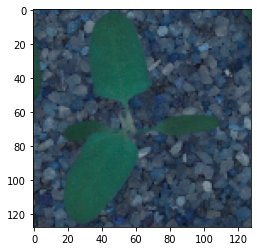

Label    Fat Hen
Name: 502, dtype: object


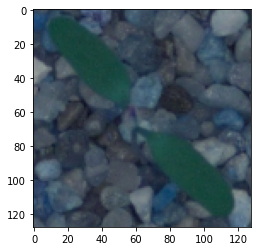

Label    Fat Hen
Name: 503, dtype: object


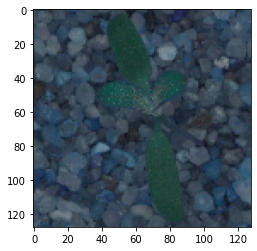

Label    Fat Hen
Name: 504, dtype: object


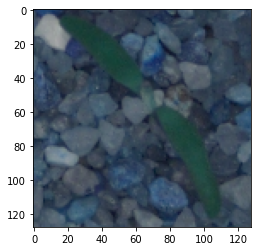

Label    Fat Hen
Name: 505, dtype: object


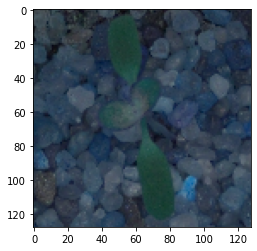

Label    Fat Hen
Name: 506, dtype: object


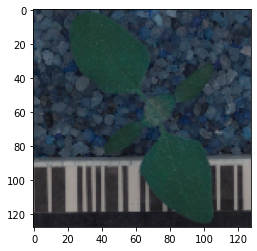

Label    Fat Hen
Name: 507, dtype: object


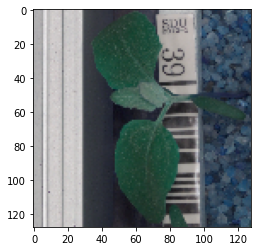

Label    Fat Hen
Name: 508, dtype: object


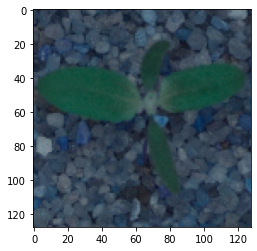

Label    Fat Hen
Name: 509, dtype: object


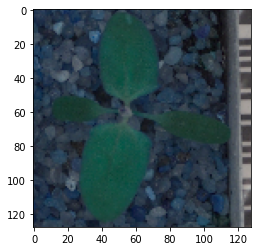

Label    Fat Hen
Name: 510, dtype: object


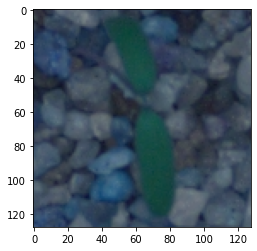

Label    Fat Hen
Name: 511, dtype: object


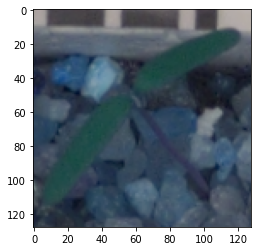

Label    Fat Hen
Name: 512, dtype: object


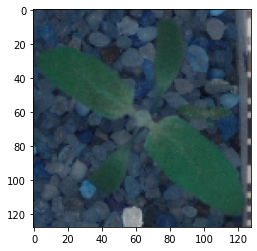

Label    Fat Hen
Name: 513, dtype: object


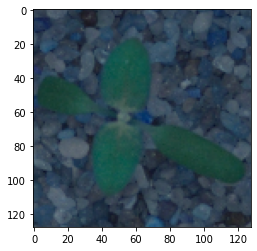

Label    Fat Hen
Name: 514, dtype: object


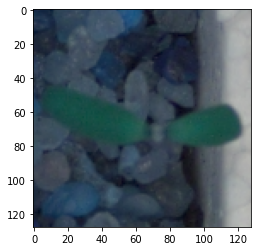

Label    Fat Hen
Name: 515, dtype: object


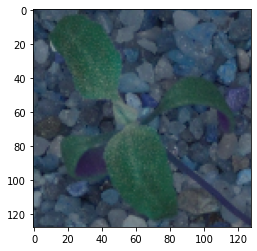

Label    Fat Hen
Name: 516, dtype: object


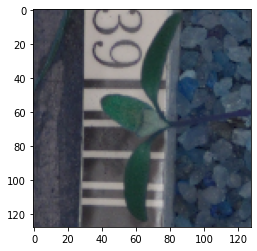

Label    Fat Hen
Name: 517, dtype: object


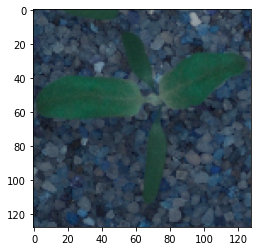

Label    Fat Hen
Name: 518, dtype: object


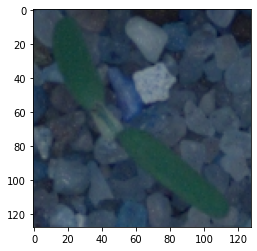

Label    Fat Hen
Name: 519, dtype: object


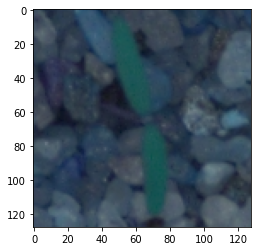

Label    Fat Hen
Name: 520, dtype: object


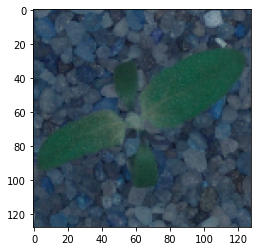

Label    Fat Hen
Name: 521, dtype: object


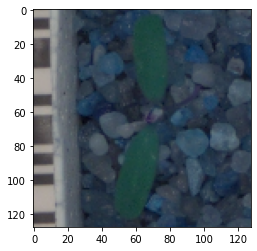

Label    Fat Hen
Name: 522, dtype: object


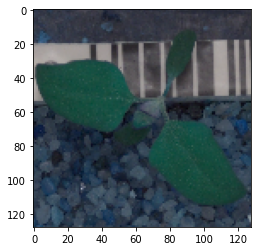

Label    Fat Hen
Name: 523, dtype: object


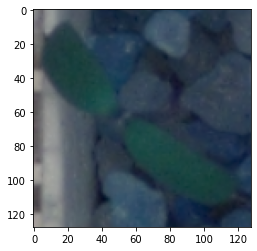

Label    Fat Hen
Name: 524, dtype: object


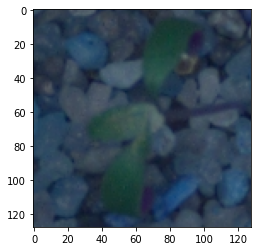

Label    Fat Hen
Name: 525, dtype: object


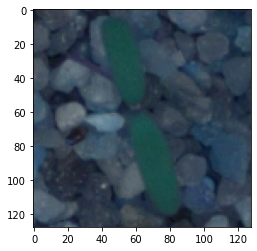

Label    Fat Hen
Name: 526, dtype: object


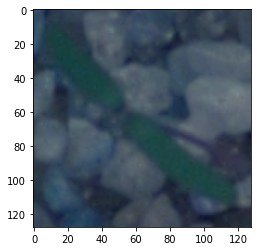

Label    Fat Hen
Name: 527, dtype: object


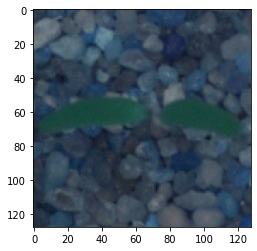

Label    Fat Hen
Name: 528, dtype: object


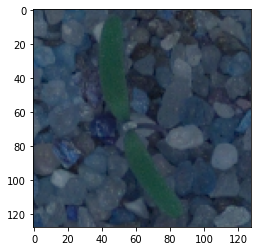

Label    Fat Hen
Name: 529, dtype: object


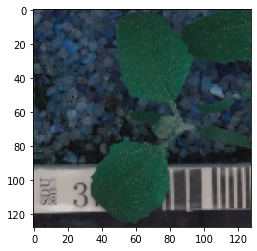

Label    Fat Hen
Name: 530, dtype: object


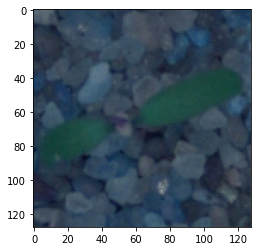

Label    Fat Hen
Name: 531, dtype: object


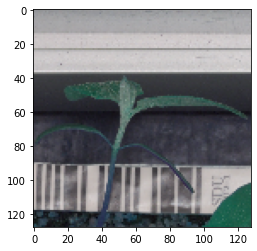

Label    Fat Hen
Name: 532, dtype: object


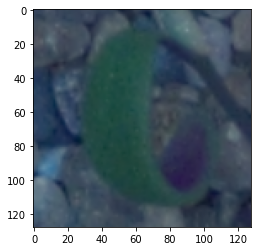

Label    Fat Hen
Name: 533, dtype: object


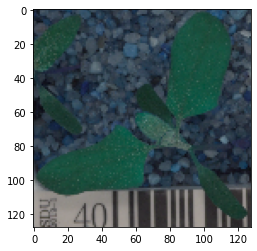

Label    Fat Hen
Name: 534, dtype: object


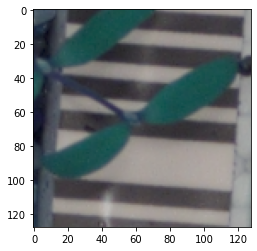

Label    Fat Hen
Name: 535, dtype: object


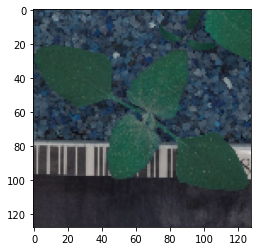

Label    Fat Hen
Name: 536, dtype: object


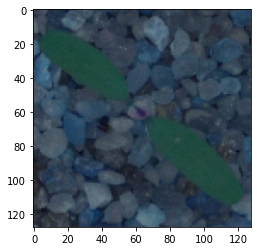

Label    Fat Hen
Name: 537, dtype: object


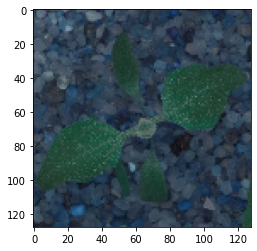

Label    Fat Hen
Name: 538, dtype: object


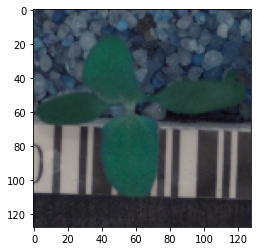

Label    Fat Hen
Name: 539, dtype: object


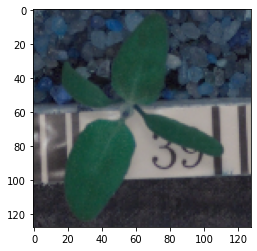

Label    Fat Hen
Name: 540, dtype: object


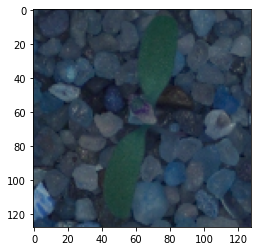

Label    Fat Hen
Name: 541, dtype: object


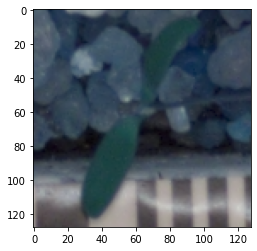

Label    Fat Hen
Name: 542, dtype: object


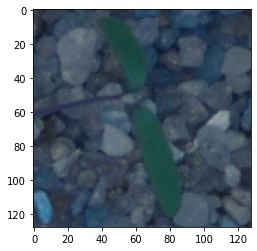

Label    Fat Hen
Name: 543, dtype: object


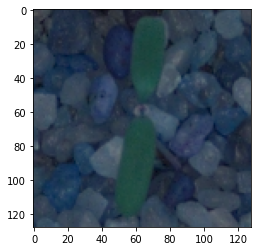

Label    Fat Hen
Name: 544, dtype: object


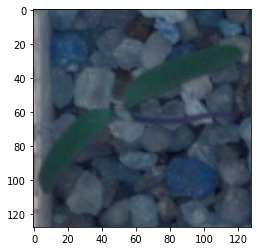

Label    Fat Hen
Name: 545, dtype: object


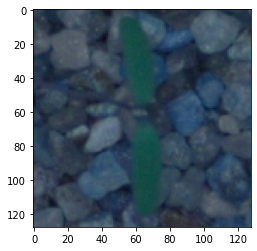

Label    Fat Hen
Name: 546, dtype: object


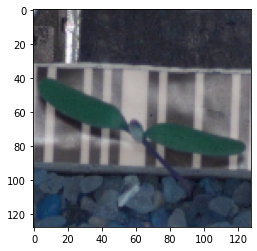

Label    Fat Hen
Name: 547, dtype: object


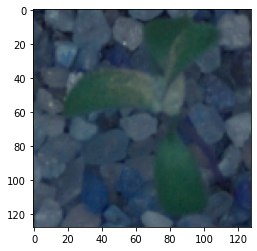

Label    Fat Hen
Name: 548, dtype: object


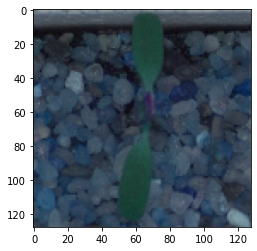

Label    Fat Hen
Name: 549, dtype: object


In [10]:
#Plot first ten images
for ind in range(496,550):
  plt.imshow(np_image[ind])
  plt.show()
  print(df_lbl.loc[ind,:])

## Implementing Gaussian Bluring

### Defining Kernel for Blurring of shape 5 cross 5

In [11]:
kernel = np.array([[0.003765,0.015019,0.023792,0.015019,0.003765],
                   [0.015019,0.059912,0.094907,0.059912,0.015019],
                   [0.023792,0.094907,0.150342,0.094907,0.023792],
                   [0.015019,0.059912,0.094907,0.059912,0.015019],
                   [0.003765,0.015019,0.023792,0.015019,0.003765]])

### Gaussian Blurring

(4750, 128, 128)
(128, 128)
(5, 5)
Actual image


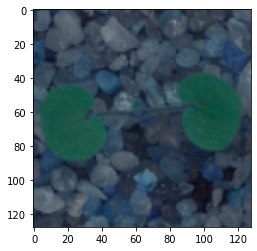

Grayed Image


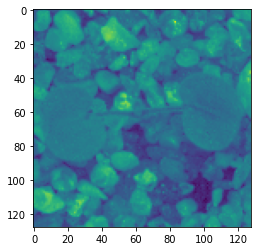

Blured image


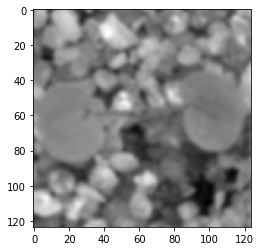

Actual image


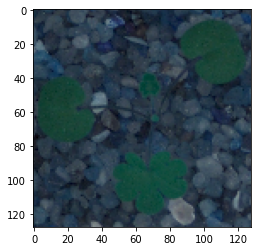

Grayed Image


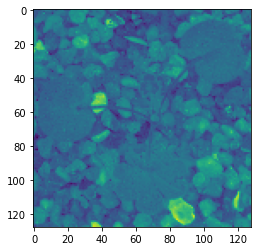

Blured image


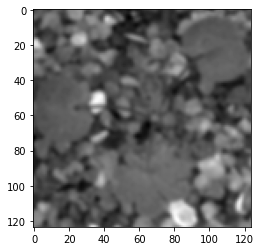

Actual image


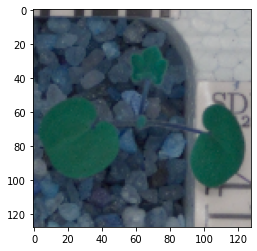

Grayed Image


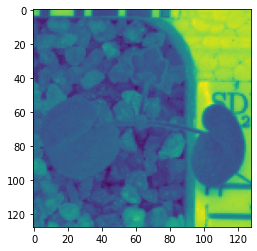

Blured image


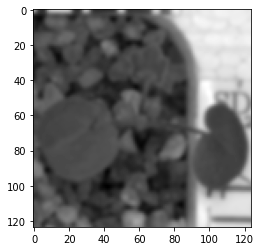

Actual image


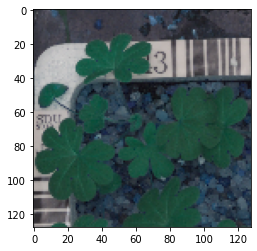

Grayed Image


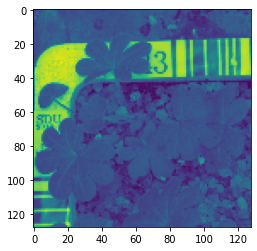

Blured image


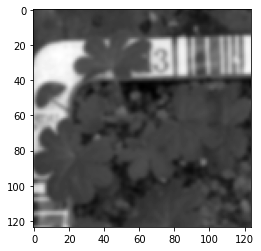

Actual image


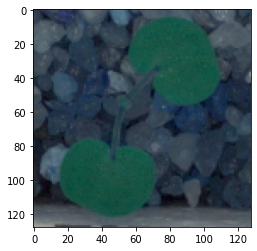

Grayed Image


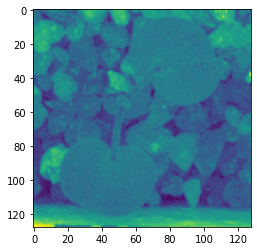

Blured image


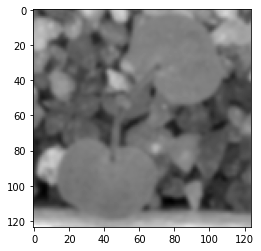

Actual image


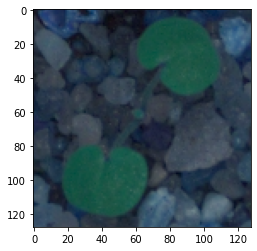

Grayed Image


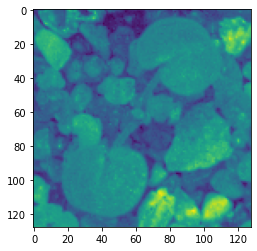

Blured image


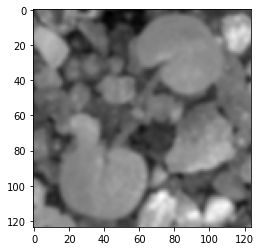

Actual image


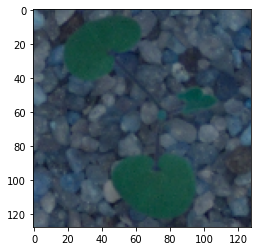

Grayed Image


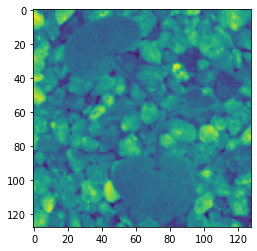

Blured image


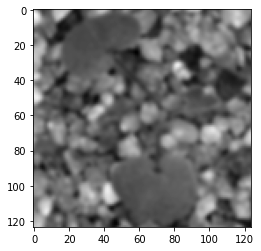

Actual image


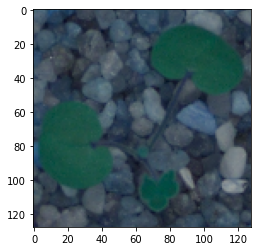

Grayed Image


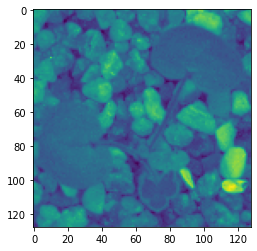

Blured image


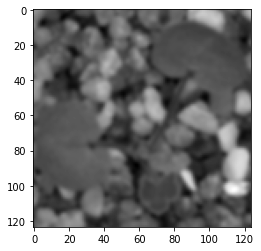

Actual image


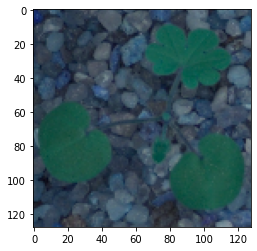

Grayed Image


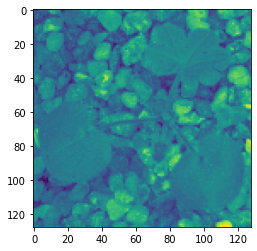

Blured image


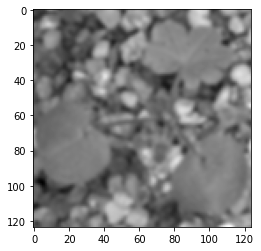

Actual image


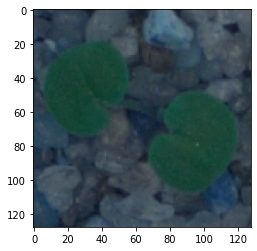

Grayed Image


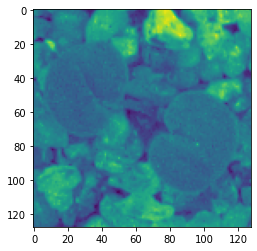

Blured image


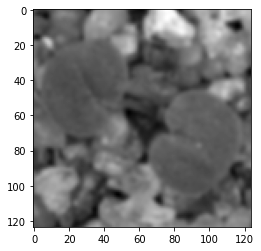

In [12]:
from scipy.signal import convolve2d
from skimage import color
from tensorflow.image import rgb_to_grayscale

#np_image_gry = np.empty()
#np_image_blu = np.empty()

rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(np_image[...,:3], rgb_weights)
print(grayscale_image.shape)
print(grayscale_image[10].shape)
print(kernel.shape)

for ind in range(10):
  np_image_ind = color.rgb2gray(np_image[ind])

  print('Actual image')
  plt.imshow(np_image[ind])
  plt.show()

  print('Grayed Image')
  plt.imshow(grayscale_image[ind])
  plt.show()

  #print(np_image[11].shape)
  #rgb_to_grayscale(np_image[11])

  # show the image after convolution (after blurring)
  print('Blured image')
  blurred_image_ind = convolve2d(np_image_ind, kernel, mode = 'valid')
  plt.imshow(blurred_image_ind,cmap='gray')                       
  plt.show()




## Splitting data set into Train, Validation and Test 

In [13]:
X_train_val,X_test,y_train_val,y_test = train_test_split(np_image,df_lbl,train_size=0.8, random_state=0)
X_train,X_val,y_train,y_val = train_test_split(X_train_val,y_train_val,train_size=0.7, random_state=0)

In [14]:
X_train.shape

(2660, 128, 128, 3)

In [15]:
X_test.shape

(950, 128, 128, 3)

## Converting Label variable that is Train, Validation and Test to one hot vectors

In [16]:
# Convert labels to one hot vectors.
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train = enc.fit_transform(y_train)
y_val   = enc.fit_transform(y_val)
y_test = enc.fit_transform(y_test)

In [17]:
print(y_train.shape)
print(y_test.shape)

(2660, 12)
(950, 12)


#### Shape of the the data already in compatible shape

### Normalization of the Train, Test and Validation data set 

In [18]:
X_train = X_train.astype('float32') # Conversion to float type from integer type.
X_test = X_test.astype('float32')
X_val  = X_val.astype('float32')
X_train /= 255.0 # Division by 255
X_test /= 255.0
X_val /= 255.0

## Building CNN

### Defining CNN Layers before the output layers

In [19]:
batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))


### Defining output layers and setting 12 neurons for 12 classes in the label

In [20]:
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

### Setting the "Adam" Optimizer 

In [21]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

### Compiling the mdel using Categorical Cross Entropy

In [22]:
# Setting the metrics as "Accuracy" and Optimizer as "Adam"
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [23]:
# Network structure is summarized which confirms our design was implemented correctly.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [24]:
#early stopping callback addition to the fit function is going to stop the training, if the validation loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=12)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training. 

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [25]:
X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)
X_val  = X_val.reshape(X_val.shape[0], 128, 128, 3)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(2660, 128, 128, 3)
(950, 128, 128, 3)
(1140, 128, 128, 3)


In [26]:
print(y_train.shape)

(2660, 12)


In [27]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=12)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

## Fit and Evaluate Model

### Fit Model using X_train/y_train and validation set as X_val/y_val

Epoch 1/50
84/84 [==============================] - 6s 36ms/step - loss: 3.1220 - accuracy: 0.1393 - val_loss: 2.5717 - val_accuracy: 0.1482

Epoch 00001: val_loss improved from inf to 2.57173, saving model to cifar_cnn_checkpoint_01_loss2.5717.h5
Epoch 2/50
84/84 [==============================] - 2s 30ms/step - loss: 1.9874 - accuracy: 0.3128 - val_loss: 4.0516 - val_accuracy: 0.1482

Epoch 00002: val_loss did not improve from 2.57173
Epoch 3/50
84/84 [==============================] - 3s 30ms/step - loss: 1.5828 - accuracy: 0.4513 - val_loss: 5.6785 - val_accuracy: 0.1482

Epoch 00003: val_loss did not improve from 2.57173
Epoch 4/50
84/84 [==============================] - 3s 30ms/step - loss: 1.4262 - accuracy: 0.5023 - val_loss: 4.9217 - val_accuracy: 0.1509

Epoch 00004: val_loss did not improve from 2.57173
Epoch 5/50
84/84 [==============================] - 3s 30ms/step - loss: 1.2984 - accuracy: 0.5569 - val_loss: 3.5574 - val_accuracy: 0.1684

Epoch 00005: val_loss did not i

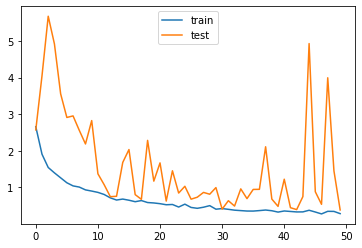

In [28]:
history = model.fit(X_train,y_train 
                    ,epochs=50,
                    validation_data=(X_val, y_val),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Evaluate built model

In [29]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

30/30 [==============================] - 0s 11ms/step - loss: 0.3422 - accuracy: 0.8821
Test loss: 0.34220314025878906
Test accuracy: 0.88210529088974


### Prediction

In [30]:
y_pred = model.predict(X_test)

In [31]:
y_pred


array([[3.5332909e-01, 1.3617878e-08, 4.1181750e-07, ..., 1.6271565e-12,
        8.5978833e-09, 1.4460264e-07],
       [3.5575603e-08, 9.9576890e-01, 4.1245120e-03, ..., 2.3771506e-06,
        8.7930803e-06, 8.6082873e-05],
       [4.0847025e-04, 5.4412097e-09, 2.4982504e-07, ..., 5.6833200e-15,
        4.5029740e-11, 6.5281658e-10],
       ...,
       [3.2950225e-05, 7.9704504e-03, 7.8910125e-06, ..., 8.6797887e-01,
        7.4239381e-02, 1.6340801e-03],
       [2.9824385e-08, 3.7907722e-11, 2.8415843e-11, ..., 2.2391760e-04,
        4.8294110e-06, 5.5083533e-06],
       [9.4874829e-02, 5.7653045e-12, 1.5554540e-11, ..., 2.2437948e-12,
        1.3860418e-07, 9.7395914e-09]], dtype=float32)

In [32]:
y_test

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Confusion Matrix and Accuracy Score

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from tensorflow.math import argmax
y_test_one = argmax(y_test,1)
y_pred_one = argmax(y_pred,1)
y_pred_one
cf_mtrx = confusion_matrix(y_test_one,y_pred_one)
cf_mtrx

array([[ 31,   0,   1,   0,   3,   1,  21,   0,   0,   0,   0,   1],
       [  0,  65,   8,   0,   0,   1,   0,   0,   0,   0,   2,   0],
       [  0,   0,  57,   1,   3,   0,   0,   0,   1,   0,   1,   0],
       [  0,   0,   0, 113,   0,   1,   0,   0,   1,   2,   2,   0],
       [  2,   0,   0,   0,  43,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   2,   0,   0,  97,   0,   0,   0,   0,   0,   0],
       [ 17,   0,   0,   1,   1,   2, 103,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0,   1,   0,   0,  38,   0,   0,   0,   2],
       [  1,   1,   0,   2,   0,   1,   0,   0,  81,   9,   0,   0],
       [  0,   0,   0,   2,   0,   0,   0,   0,   7,  36,   2,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  99,   0],
       [  0,   0,   2,   0,   1,   3,   0,   0,   0,   0,   1,  75]])

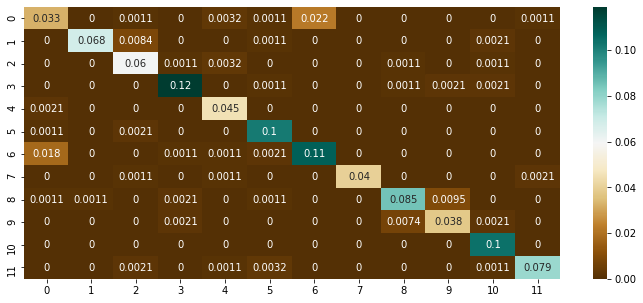

In [34]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.heatmap(cf_mtrx/np.sum(cf_mtrx), annot=True,cmap='BrBG')

In [35]:
accuracy_score(y_test_one,y_pred_one)

0.8821052631578947

In [36]:
from io import StringIO 
class_rprt_str = classification_report(y_test_one,y_pred_one)
class_rprt = StringIO(class_rprt_str)
df_class_rprt = pd.read_csv(class_rprt,sep=',')
df_class_rprt.loc[1:2,:]

precision    recall  f1-score   support
1             1       0.98      0.86      0.92   ...   
2             2       0.80      0.90      0.85   ...

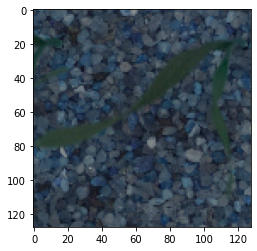

Predicted value is  tf.Tensor(4, shape=(), dtype=int64)


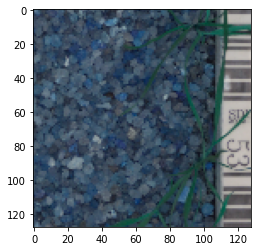

Predicted value is  tf.Tensor(6, shape=(), dtype=int64)


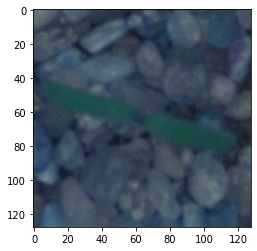

Predicted value is  tf.Tensor(5, shape=(), dtype=int64)


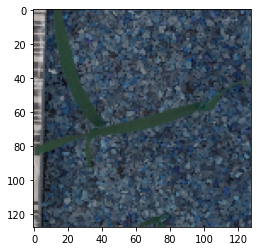

Predicted value is  tf.Tensor(4, shape=(), dtype=int64)


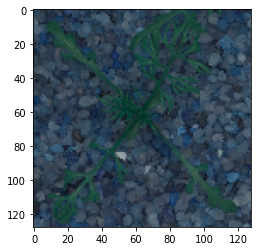

Predicted value is  tf.Tensor(8, shape=(), dtype=int64)


In [37]:
lst_var = [2,3,33,36,59]
for ind in lst_var:
  plt.imshow(X_test[ind])
  plt.show()
  print('Predicted value is ',y_pred_one[ind])